In [1]:
# import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
import time
from datetime import datetime 

In [3]:
import requests

In [4]:
from config import weather_api_key

In [41]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=389b0c25955e4922ed3bb4f12e1e63ab


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.389937047122942 -153.58526448514644
85.6638873887693 -130.6538459448817
69.5715292572952 149.95856087722842
-27.865480613709444 113.07311749673954
68.31105810087334 -119.98742077632076
-55.5884399532065 -56.055937549503156
46.4781638957441 -129.23592520520248
-44.90096960621546 -145.68715727983434
-56.398300215645854 -179.92994765654032
-43.07126543368728 151.87381142639043
-16.10804284789998 95.68721815010935
62.73148111862534 -13.947439898116414
73.86474808927454 49.3779605689171
-17.401176708966773 -106.29099928357529
-60.87821719400001 21.42728049006621
12.957308406770295 56.34254075506968
37.93636258273307 -4.761379480851474
-77.93390182640465 -144.21579584819165
-61.24242186114947 -157.15219912021587
-71.1126695812225 -144.7437100504772
0.09426126737848506 77.73209870911887
83.5673067436772 -25.477695533517732
-43.25713431357745 105.86830321637046
0.5017601847691537 -153.56117967713314
-69.53460101124567 -84.53562312045884
-22.556805548981885 -114.70651615289388
-58.8914329383

-83.9415846075982 -40.838035404690345
-37.64509410579156 63.779769526334775
2.178923088580376 56.461137862414176
-10.034312197373723 -1.2765672746866414
-44.105433451036276 88.50816884016177
10.577543121035418 -35.83908342742694
-33.451809371959456 -135.42770485261968
-41.38715432661204 158.13467656738646
44.493968487182116 -21.806259575826886
62.553011158594046 102.13126368824521
49.915739410202576 -86.43290518492495
56.68515157552824 92.8428125629942
71.69930840612759 121.08970846605786
47.34302096541711 -34.23960629388563
-8.754442049997905 130.46739270247838
33.82939208392908 22.603229623856322
72.02681336824014 -80.43038454999574
-89.52994819329787 -126.97405415871269
58.74431333396325 -82.15037804821887
12.455263091567573 -152.06322995469037
-46.47698516704274 -0.445342873199877
10.830671269260023 168.2460548785955
-15.844739653880112 51.000498490277835
30.291427468633273 110.71914235434133
13.842746779711689 -80.65242634884682
-46.898132416526565 176.56129390388998
16.0393495067

In [9]:
# create a list for holding the cities
cities = []
# Identifying nearest city
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)
    
    

639

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ucluelet
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | cordoba
Processing Record 18 of Set 1 | viligili
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 

Processing Record 35 of Set 4 | russell
Processing Record 36 of Set 4 | budureasa
Processing Record 37 of Set 4 | vila franca do campo
Processing Record 38 of Set 4 | chara
Processing Record 39 of Set 4 | mayo
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | dicabisagan
Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | ust-ilimsk
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | satun
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | umaria
Processing Record 2 of Set 5 | savinka
Processing Record 3 of Set 5 | lukovetskiy
Processing Record 4 of Set 5 | beinamar
Processing Record 5 of Set 5 | port hedland
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | shumerlya
Processing Re

Processing Record 28 of Set 8 | eureka
Processing Record 29 of Set 8 | spiridonovka
Processing Record 30 of Set 8 | mabaruma
Processing Record 31 of Set 8 | killybegs
Processing Record 32 of Set 8 | bababe
City not found. Skipping...
Processing Record 33 of Set 8 | qaqortoq
Processing Record 34 of Set 8 | salar
Processing Record 35 of Set 8 | tottori
Processing Record 36 of Set 8 | ngunguru
Processing Record 37 of Set 8 | morada nova
Processing Record 38 of Set 8 | asamankese
Processing Record 39 of Set 8 | barguzin
Processing Record 40 of Set 8 | blackwater
Processing Record 41 of Set 8 | pinega
Processing Record 42 of Set 8 | leningradskiy
Processing Record 43 of Set 8 | mitsamiouli
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | angoche
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 8 | ponta do sol
Processing Record 49 of Set 8 | cururupu
Processing Record 50 of Set 8 | isangel
P

Processing Record 12 of Set 12 | buala
Processing Record 13 of Set 12 | gazli
Processing Record 14 of Set 12 | nizhniy kuranakh
Processing Record 15 of Set 12 | lundazi
Processing Record 16 of Set 12 | togur
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | dzerzhinsk
Processing Record 19 of Set 12 | baoying
Processing Record 20 of Set 12 | tautira
Processing Record 21 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 22 of Set 12 | nanakuli
Processing Record 23 of Set 12 | holly hill
Processing Record 24 of Set 12 | kudahuvadhoo
Processing Record 25 of Set 12 | oxford
Processing Record 26 of Set 12 | vetapalem
Processing Record 27 of Set 12 | kupang
Processing Record 28 of Set 12 | umm lajj
Processing Record 29 of Set 12 | paracuru
Processing Record 30 of Set 12 | pistoia
Processing Record 31 of Set 12 | poltava
Processing Record 32 of Set 12 | ketchikan
Processing Record 33 of Set 12 | buariki
City not found. Skipping...
Processing Record 34 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,77.22,73,19,12.39,PF,2022-07-21 16:32:20
1,Tuktoyaktuk,69.4541,-133.0374,51.80,87,100,2.30,CA,2022-07-21 16:32:21
2,Chokurdakh,70.6333,147.9167,37.53,55,94,7.54,RU,2022-07-21 16:32:22
3,Geraldton,-28.7667,114.6000,61.63,62,54,11.65,AU,2022-07-21 16:32:23
4,Norman Wells,65.2820,-126.8329,60.84,88,75,0.00,CA,2022-07-21 16:32:24
5,Ushuaia,-54.8000,-68.3000,31.62,93,75,24.16,AR,2022-07-21 16:32:25
6,Ucluelet,48.9329,-125.5528,57.09,93,68,1.01,CA,2022-07-21 16:30:42
7,Mataura,-46.1927,168.8643,39.47,96,100,1.59,NZ,2022-07-21 16:32:26
8,Vaini,-21.2000,-175.2000,66.36,100,20,4.61,TO,2022-07-21 16:32:28
9,Hobart,-42.8794,147.3294,39.27,90,0,1.01,AU,2022-07-21 16:32:28


In [12]:
new_Columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_Columns_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2022-07-21 16:32:20,-16.4833,-151.7500,77.22,73,19,12.39
1,Tuktoyaktuk,CA,2022-07-21 16:32:21,69.4541,-133.0374,51.80,87,100,2.30
2,Chokurdakh,RU,2022-07-21 16:32:22,70.6333,147.9167,37.53,55,94,7.54
3,Geraldton,AU,2022-07-21 16:32:23,-28.7667,114.6000,61.63,62,54,11.65
4,Norman Wells,CA,2022-07-21 16:32:24,65.2820,-126.8329,60.84,88,75,0.00
...,...,...,...,...,...,...,...,...,...
575,Joao Pinheiro,BR,2022-07-21 16:44:47,-17.7425,-46.1725,81.59,30,1,7.63
576,Salamiyah,SY,2022-07-21 16:44:48,35.0113,37.0532,79.97,47,0,17.25
577,Lamar,US,2022-07-21 16:44:48,33.6668,-95.5836,96.78,52,100,6.91
578,Margate,GB,2022-07-21 16:44:49,51.3813,1.3862,69.12,74,57,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [15]:
import time

today = time.strftime("%x")
today

'07/21/22'

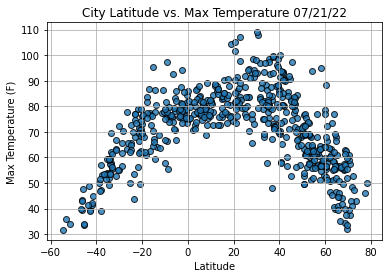

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

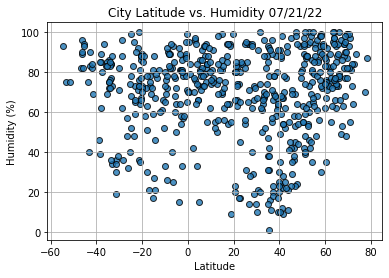

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

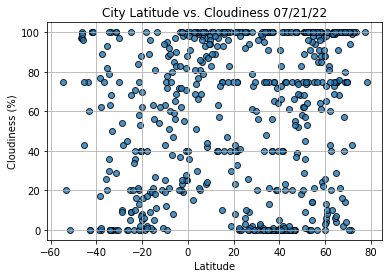

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

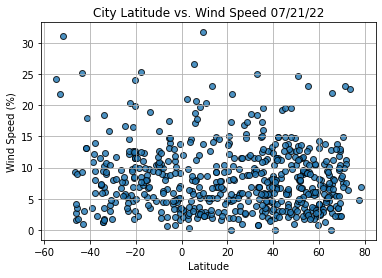

In [62]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-07-21 16:32:32
Lat                      -34.5322
Lng                       20.0403
Max Temp                    49.24
Humidity                       86
Cloudiness                     30
Wind Speed                    1.3
Name: 13, dtype: object

In [64]:
# Import linregress
from scipy.stats import linregress

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

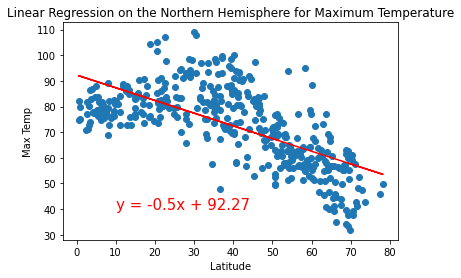

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

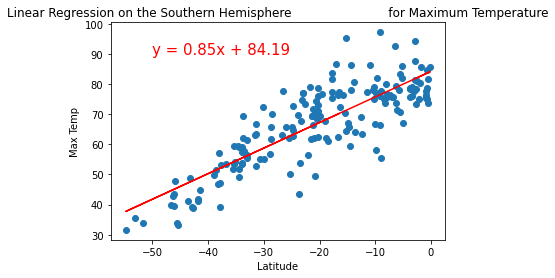

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

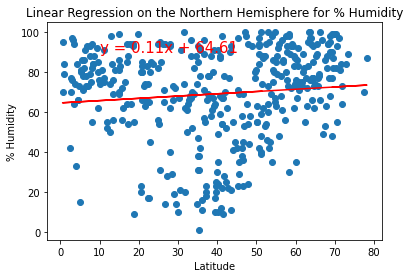

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(10,90))

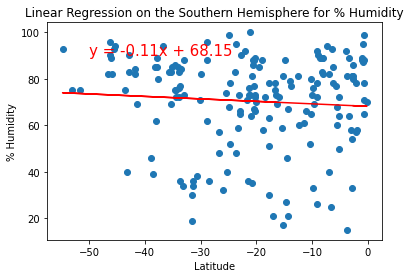

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,90))

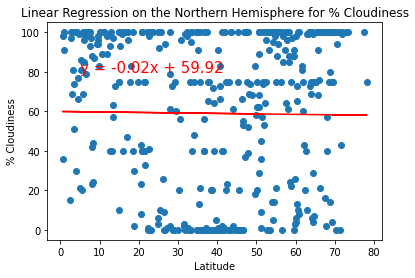

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,80))

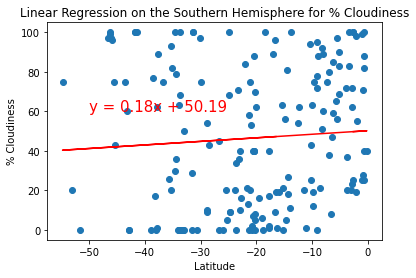

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

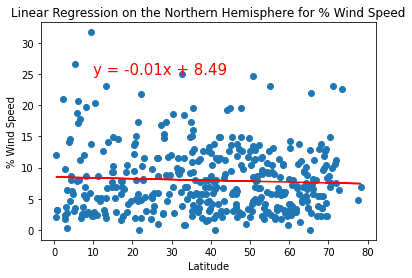

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Wind Speed', '% Wind Speed',(10,25))

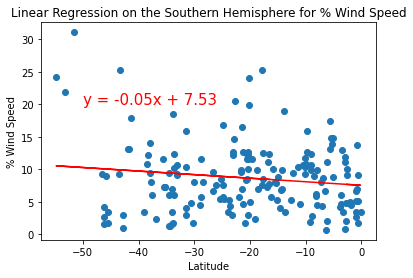

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Wind Speed', '% Wind Speed',(-50,20))